Importing the necessary libraries

In [1]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

## Full Code

In [2]:
from selenium.webdriver.firefox.options import Options

options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'
driver = webdriver.Firefox(executable_path=r'C:\geckodriver.exe', options=options)

page_url = " https://harrypotter.fandom.com/wiki/Category:Individuals"
driver.get(page_url)
driver.refresh()
time.sleep(10)

categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

event_categories = []
for n in categories:
    event_url = n.get_attribute('href')
    event_name = n.text
    event_categories.append({'condition':event_name, "url":event_url })
    

In [3]:
event_categories

[{'condition': 'Template:Individual infobox test',
  'url': 'https://harrypotter.fandom.com/wiki/Template:Individual_infobox_test'},
 {'condition': 'Category:Deceased individuals',
  'url': 'https://harrypotter.fandom.com/wiki/Category:Deceased_individuals'},
 {'condition': 'Category:Deities',
  'url': 'https://harrypotter.fandom.com/wiki/Category:Deities'},
 {'condition': 'Category:Disowned individuals',
  'url': 'https://harrypotter.fandom.com/wiki/Category:Disowned_individuals'},
 {'condition': 'Category:Fictional characters',
  'url': 'https://harrypotter.fandom.com/wiki/Category:Fictional_characters'},
 {'condition': 'Category:Impersonated individuals',
  'url': 'https://harrypotter.fandom.com/wiki/Category:Impersonated_individuals'},
 {'condition': 'Category:Individuals by house',
  'url': 'https://harrypotter.fandom.com/wiki/Category:Individuals_by_house'},
 {'condition': 'Category:Individuals by physical characteristics',
  'url': 'https://harrypotter.fandom.com/wiki/Category:I

In [4]:
character_list = []
for e in event_categories:
    driver.get(e['url'])
    character_elems= driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

    for elem in character_elems:
        character_list.append({'events':e['condition'], 'character': elem.text})

In [5]:
character_df = pd.DataFrame(character_list)

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


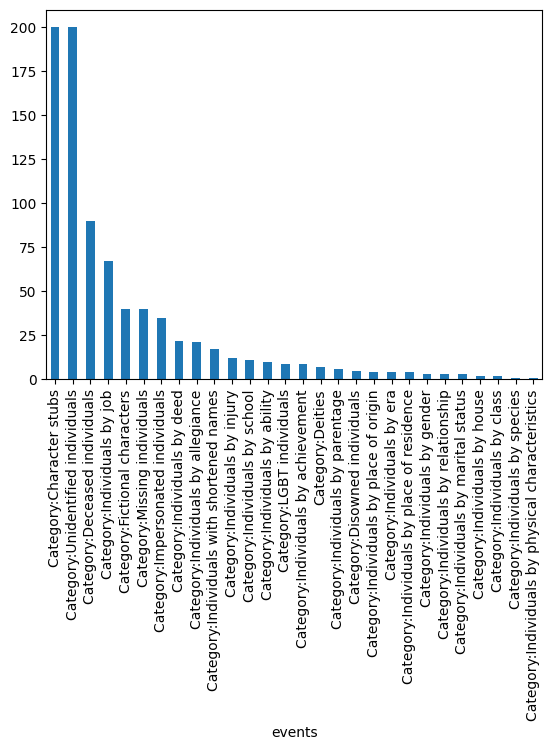

In [7]:
import matplotlib.pyplot as plt
character_df["events"].value_counts().plot(kind='bar')
plt.show()

In [8]:
character_df

,events,character
0,Category:Deceased individuals,Giffard Abbott
1,Category:Deceased individuals,Falco Aesalon
2,Category:Deceased individuals,Walter Aragon
3,Category:Deceased individuals,Podric Batworthy
4,Category:Deceased individuals,Bragbor the Boastful
...,...,...
823,Category:Character stubs,Baglan Wellnelly
824,Category:Character stubs,Gruffyd Wellnelly
825,Category:Character stubs,Daphne Wenlock
826,Category:Character stubs,Ethel Wigley


In [11]:
character_df.to_csv('Harry_potter_characters.csv')